In [28]:
# Project Deliverable 4 in MSCS 634: Final Insights and Recommendations
# Name: Reshmika Gotru, Pushya Mithra Kotakonda, Maduri Ramadoss, Peera Tienthong, Bhanu Prakash Cherukuri
# Course: Advanced Big Data and Data Mining - Spring 2026 
# Dataset: Credit Risk Benchmark Dataset

In [29]:
# Step 1 — Load Dataset and Inspect Structure
# This stage involves loading the CSV file into a Pandas DataFrame, importing the necessary Python libraries, and examining the dataset's basic structure (rows, columns, and data types). 
# This makes it easier to verify that the dataset is understandable and appropriate for analysis.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

# Load dataset
df = pd.read_csv("dataset/credit_risk_benchmark_dataset.csv")

print("Shape (rows, columns):", df.shape)
df.head()


Note: you may need to restart the kernel to use updated packages.
Shape (rows, columns): (16714, 11)


,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0


In [31]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16714 non-null  float64
 1   age          16714 non-null  float64
 2   late_30_59   16714 non-null  float64
 3   debt_ratio   16714 non-null  float64
 4   monthly_inc  16714 non-null  float64
 5   open_credit  16714 non-null  float64
 6   late_90      16714 non-null  float64
 7   real_estate  16714 non-null  float64
 8   late_60_89   16714 non-null  float64
 9   dependents   16714 non-null  float64
 10  dlq_2yrs     16714 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.4 MB


In [32]:
# Step 2: Description and Justification of the Dataset
# This dataset is suitable due to:
# Because it fully satisfies the project requirements and provides realistic data mining challenges.

# - The dataset contains **150,000 records**, exceeding the 500-record minimum requirement by 300 times.
# - It includes **11 features**, meeting and surpassing the 8–10 attribute requirement.
# - The data reflects real-world credit risk modeling scenarios, making it highly appropriate for predictive analytics tasks.

# Additionally, this dataset presents authentic data quality challenges:

# 1. **Missing Values**
   # - Approximately **20% missing values in MonthlyIncome**
   # - Approximately **2.6% missing values in NumberOfDependents**
   # - These missing values provide opportunities to apply imputation strategies and evaluate their impact on modeling.

# 2. **Outliers / Noisy Data**
   # - Extreme values such as **96 and 98 in delinquency-related features** are known data anomalies.
   # - These unrealistic values require detection and correction to prevent distortion of statistical analysis and predictive modeling.

# 3. **Class Imbalance**
   # - The dataset exhibits a **6.7% default rate**, meaning the positive class (default) is significantly underrepresented.
   # - This imbalance creates a realistic classification challenge and will require careful evaluation metrics in later deliverables.

# Because of its size, feature variety, data quality issues, and class imbalance, this dataset provides an excellent opportunity to apply the complete data mining pipeline including preprocessing, feature engineering, predictive modeling, and evaluation.


In [33]:
# Step 3: Data Quality Checks (Basic Validity, Duplicates, Missing Values)
# Here, we verify:
# - Null values (missing values)
# - Rows that are duplicates
# - Unusual numbers (such as negative income or ages)
# - These tests guard against mistakes and deceptive outcomes in subsequent modeling.

In [34]:
# Missing values
print("Missing values per column:\n")
print(df.isnull().sum())

# Duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())

# Quick check for negative values in numeric columns
neg_counts = (df.select_dtypes(include=[np.number]) < 0).sum()
print("\nNegative value counts:\n", neg_counts[neg_counts > 0])

Missing values per column:

rev_util       0
age            0
late_30_59     0
debt_ratio     0
monthly_inc    0
open_credit    0
late_90        0
real_estate    0
late_60_89     0
dependents     0
dlq_2yrs       0
dtype: int64

Duplicate rows: 2

Negative value counts:
 Series([], dtype: int64)


In [35]:
## Step 4 — Data Cleaning
# We apply practical cleaning steps:
# 1) Remove duplicate rows (they can bias statistics and models).
# 2) Identify noisy / extreme outliers (common in credit risk data).
# 3) Treat suspicious encodings (example: monthly income = 0 might represent missing/unreported income).
# We keep the cleaning decisions transparent because they directly affect model performance.

In [36]:
df_clean = df.copy()

before = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
after = df_clean.shape[0]

print(f"Removed duplicates: {before - after}")
print("New shape:", df_clean.shape)

Removed duplicates: 2
New shape: (16712, 11)


In [37]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
rev_util,16712.0,4.800316,204.074552,0.0,0.082360,0.442986,0.926588,22000.0
age,16712.0,48.799904,13.905283,21.0,38.000000,48.000000,58.000000,101.0
late_30_59,16712.0,1.104536,7.134048,0.0,0.000000,0.000000,1.000000,98.0
debt_ratio,16712.0,30.984006,719.737845,0.0,0.156079,0.322318,0.533458,61106.5
monthly_inc,16712.0,6118.792604,5931.875772,0.0,3130.000000,5000.000000,7574.250000,250000.0
open_credit,16712.0,8.504727,5.370480,0.0,5.000000,8.000000,11.000000,57.0
late_90,16712.0,0.858006,7.128508,0.0,0.000000,0.000000,0.000000,98.0
real_estate,16712.0,1.047571,1.272589,0.0,0.000000,1.000000,2.000000,29.0
late_60_89,16712.0,0.728578,7.099399,0.0,0.000000,0.000000,0.000000,98.0
dependents,16712.0,0.944471,1.198818,0.0,0.000000,0.000000,2.000000,8.0


In [38]:
# Example: if monthly_inc == 0 is unrealistic for many cases, treat it as missing
zero_income = (df_clean["monthly_inc"] == 0).sum()
print("Rows with monthly_inc = 0:", zero_income)

# You can decide to treat these as missing values for imputation later:
df_clean["monthly_inc"] = df_clean["monthly_inc"].replace(0, np.nan)

print("Missing after converting 0 income to NaN:", df_clean["monthly_inc"].isna().sum())

Rows with monthly_inc = 0: 180
Missing after converting 0 income to NaN: 180


In [39]:
# Median imputation (simple, strong baseline)
median_income = df_clean["monthly_inc"].median()
df_clean["monthly_inc"] = df_clean["monthly_inc"].fillna(median_income)

print("Missing monthly_inc after imputation:", df_clean["monthly_inc"].isna().sum())
print("Median income used:", median_income)


Missing monthly_inc after imputation: 0
Median income used: 5000.0


In [40]:
def cap_outliers(series, lower_q=0.01, upper_q=0.99):
    lower = series.quantile(lower_q)
    upper = series.quantile(upper_q)
    return series.clip(lower, upper), lower, upper

# Cap a few known “wide range” columns
for col in ["rev_util", "debt_ratio", "monthly_inc"]:
    df_clean[col], lo, hi = cap_outliers(df_clean[col], 0.01, 0.99)
    print(f"{col}: capped to [{lo:.4f}, {hi:.4f}]")

rev_util: capped to [0.0000, 1.4476]
debt_ratio: capped to [0.0000, 368.1400]
monthly_inc: capped to [600.0000, 24166.0000]


In [41]:
# Step 5 — Exploratory Data Analysis (EDA)
# EDA helps us understand:
# - Feature distributions (normal/skewed)
# - Outliers
# - Relationships between variables
# - Class balance of the target (`dlq_2yrs`)
# These insights guide feature engineering and model selection in later deliverables.


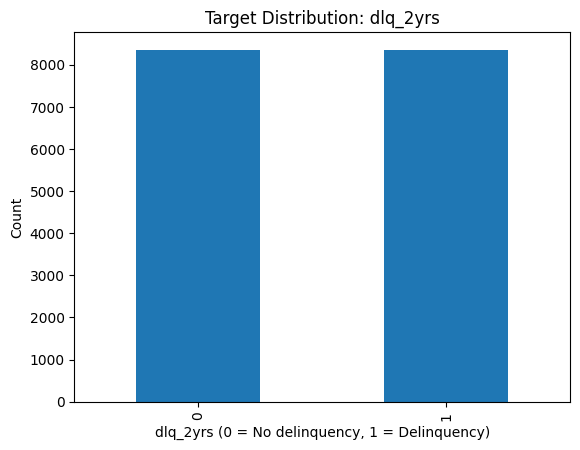

dlq_2yrs
0    0.50006
1    0.49994
Name: proportion, dtype: float64


In [42]:
plt.figure()
df_clean["dlq_2yrs"].value_counts().plot(kind="bar")
plt.title("Target Distribution: dlq_2yrs")
plt.xlabel("dlq_2yrs (0 = No delinquency, 1 = Delinquency)")
plt.ylabel("Count")
plt.show()

print(df_clean["dlq_2yrs"].value_counts(normalize=True))


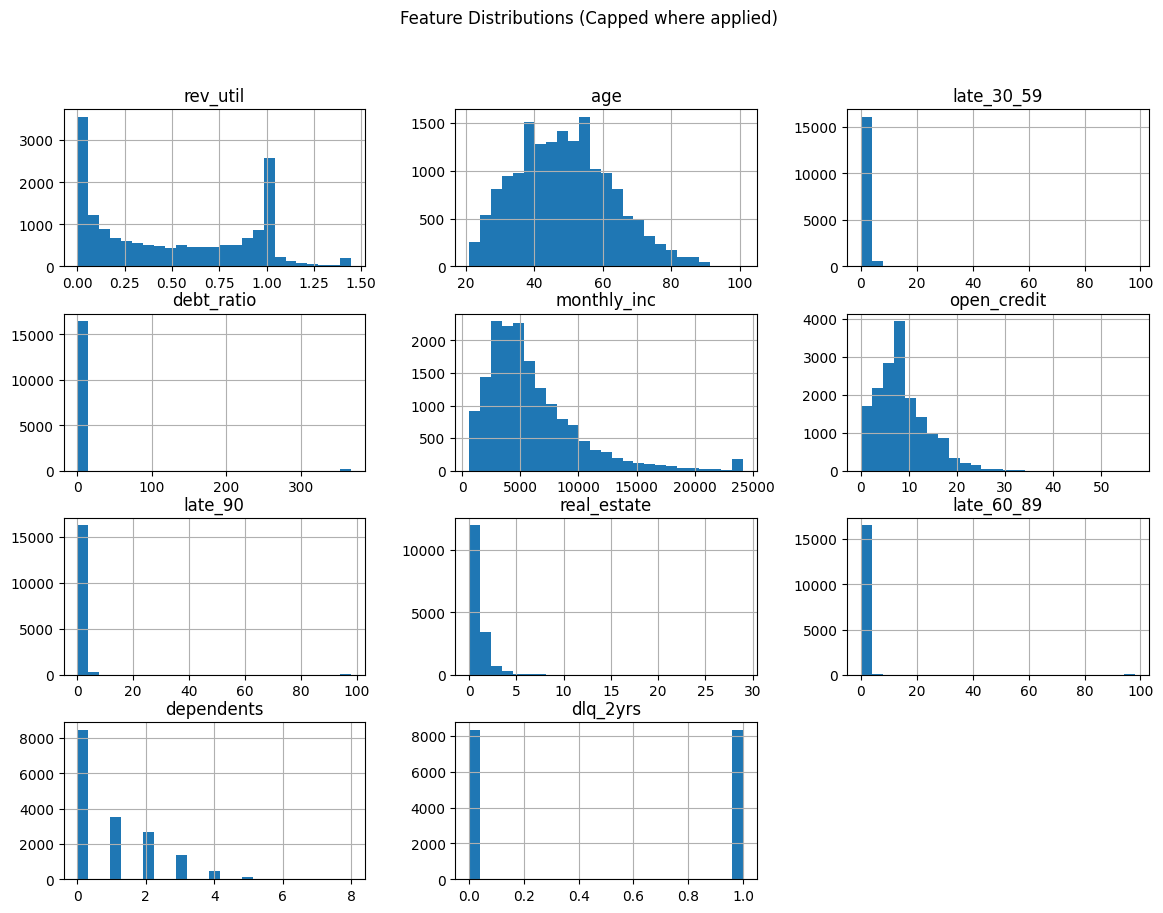

In [43]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

df_clean[num_cols].hist(bins=25, figsize=(14, 10))
plt.suptitle("Feature Distributions (Capped where applied)")
plt.show()

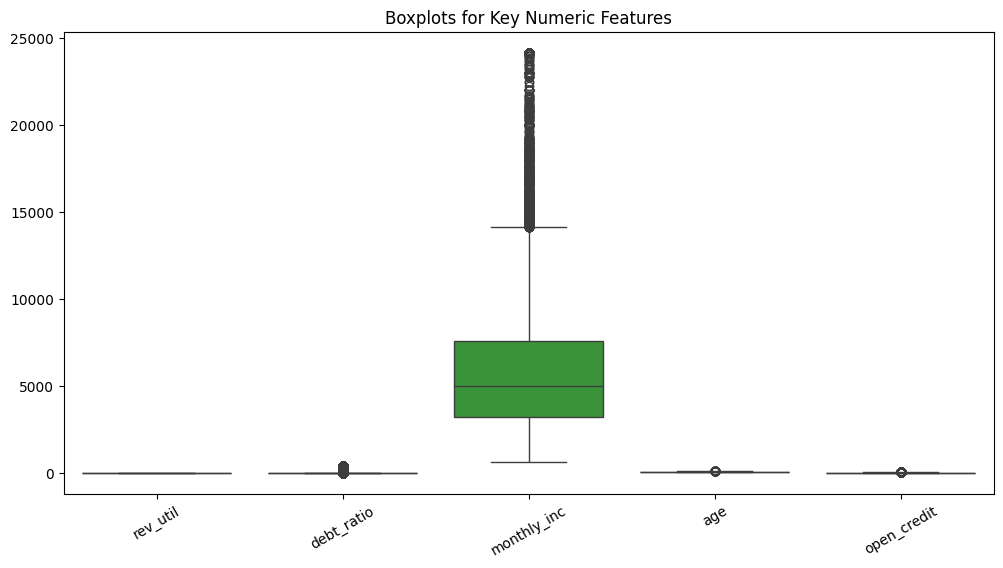

In [44]:
cols_to_plot = ["rev_util", "debt_ratio", "monthly_inc", "age", "open_credit"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[cols_to_plot])
plt.title("Boxplots for Key Numeric Features")
plt.xticks(rotation=30)
plt.show()

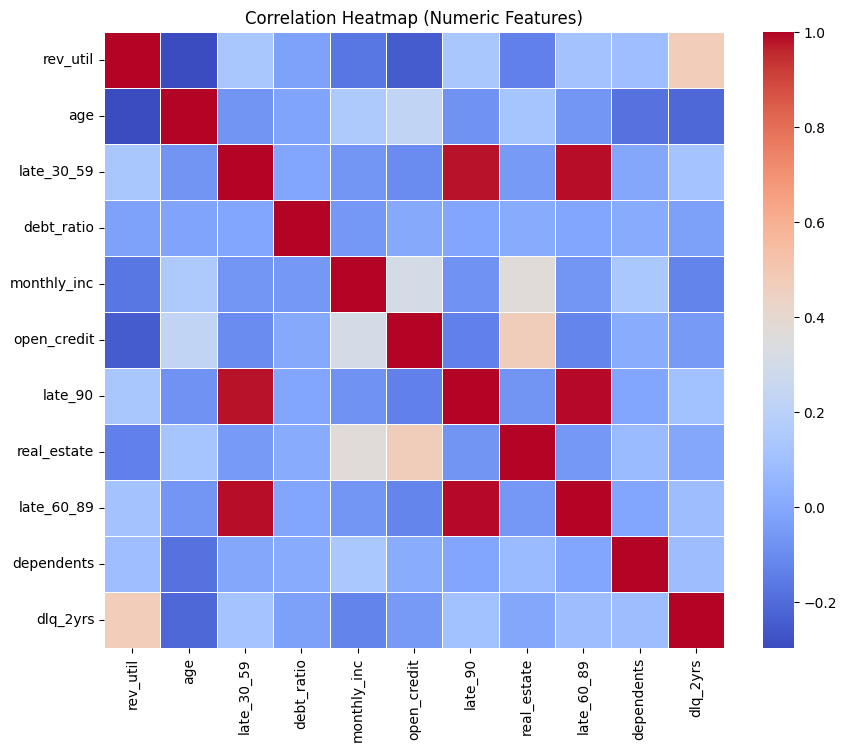

In [45]:
plt.figure(figsize=(10, 8))
corr = df_clean.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [46]:
group_means = df_clean.groupby("dlq_2yrs")[num_cols].mean().T
group_means.columns = ["No_Delinquency(0)", "Delinquency(1)"]
group_means["diff"] = group_means["Delinquency(1)"] - group_means["No_Delinquency(0)"]
group_means.sort_values("diff", ascending=False).head(10)

,No_Delinquency(0),Delinquency(1),diff
late_30_59,0.261697,1.947576,1.685880
late_90,0.106258,1.609934,1.503676
late_60_89,0.096925,1.360383,1.263458
dlq_2yrs,0.000000,1.000000,1.000000
rev_util,0.307305,0.690141,0.382836
dependents,0.840613,1.048354,0.207742
real_estate,1.053009,1.042130,-0.010879
open_credit,8.768458,8.240934,-0.527524
debt_ratio,5.728765,3.327879,-2.400886
age,51.728611,45.870497,-5.858114


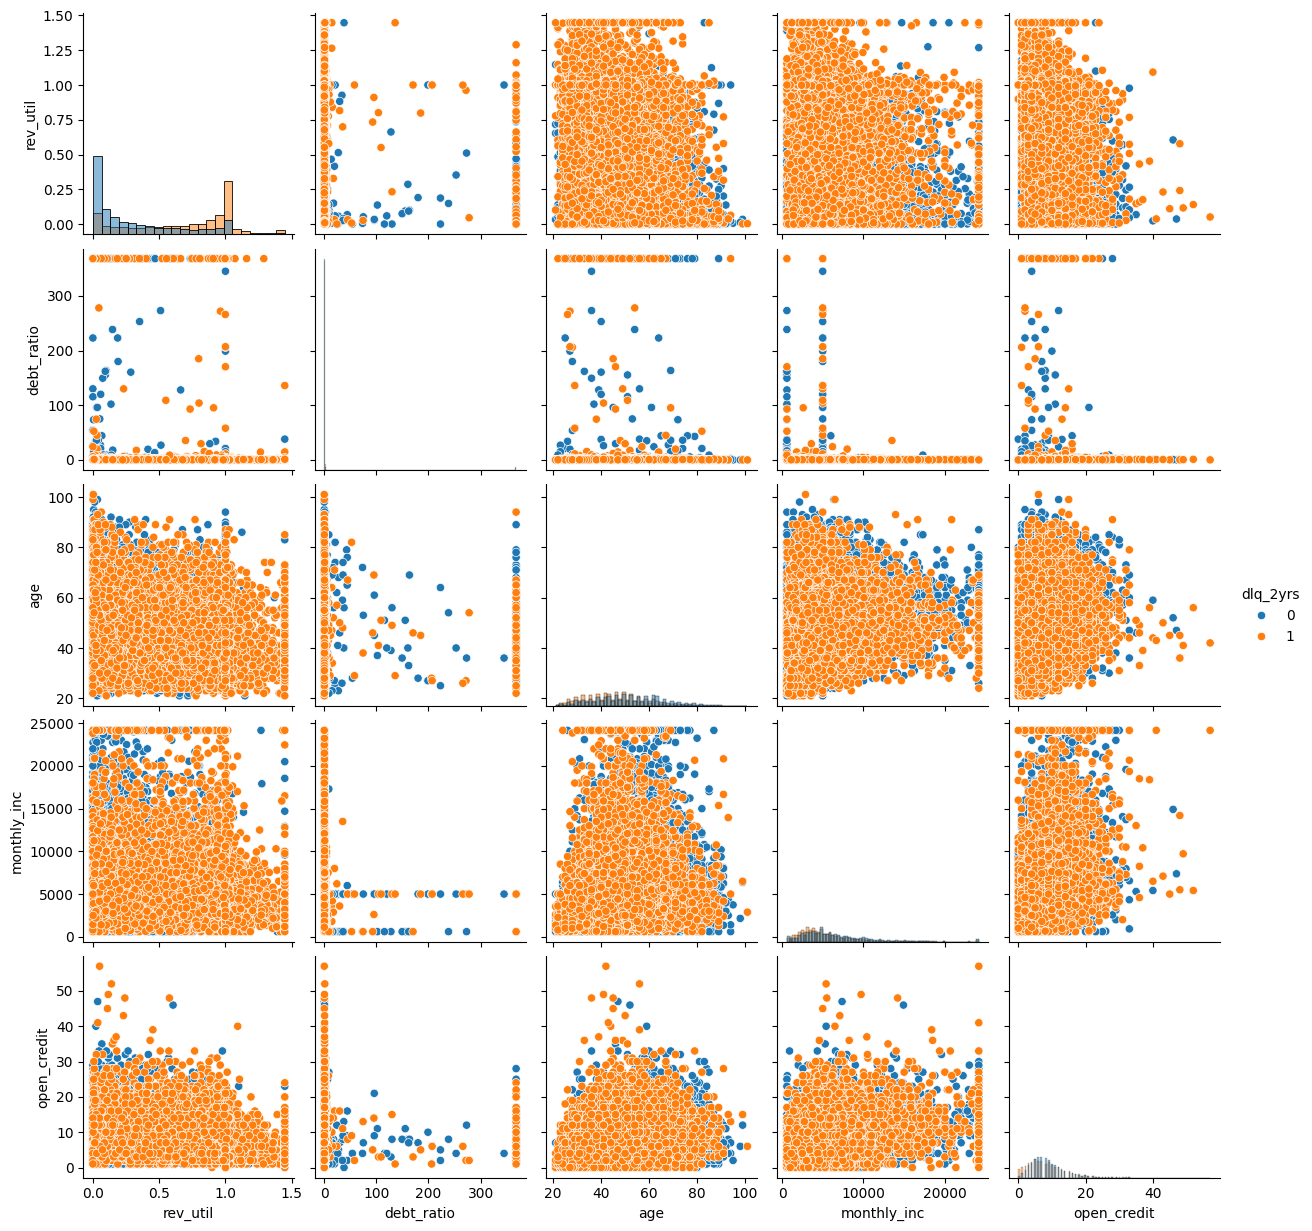

In [47]:
sample_cols = ["rev_util", "debt_ratio", "age", "monthly_inc", "open_credit", "dlq_2yrs"]
sns.pairplot(df_clean[sample_cols], hue="dlq_2yrs", diag_kind="hist")
plt.show()

In [48]:
## Step 6: EDA's Crucial Findings (Interpretation)
# Based on the analysis:

# 1) Target Balance: Because models won't be skewed toward only one class, `dlq_2yrs` seems to be fairly balanced between 0 and 1, which is useful for classification.

# 2) Outliers / Noise: Extreme numbers are displayed by variables such as `rev_util` and `debt_ratio`. Winsorization, or capping, enhances stability because these can dominate model training and skew charts.

# 3) Income Quality: `monthly_inc` contains 0 values, which could be an indication of unreported or missing income. A more realistic feature distribution is obtained by treating these as missing and attribution.

# 4) 4) **Predictive Signals:** Features associated with late payments (such as `late_30_59`, `late_60_89`, `late_90`) are anticipated to be significant predictors in Deliverable 2 (classification) and to correlate with delinquency.

# How this informs modeling in the future:
# - Use normalizing and scaling for a variety of features.
# - For skewed variables, take into account robust scaling or log transforms.
# - Make use of feature engineering tools like weighted delinquency scores and overall late counts.


In [49]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Libraries imported successfully!")


Libraries imported successfully!


In [50]:
## Regression Models and Performance Evaluation

## Step 1 — Load Data
# - Load the dataset
# - Basic inspection (shape, missing values, summary stats)


In [51]:
# Display the full dataframe (optional — may be large)
df = pd.read_csv("dataset/credit_risk_benchmark_dataset_cleaned.csv")

# Check dataset dimensions
print("Shape:", df.shape)

# View column names
print("Columns:", df.columns.tolist())

# Preview first 5 rows
df.head()


Shape: (16712, 11)
Columns: ['rev_util', 'age', 'late_30_59', 'debt_ratio', 'monthly_inc', 'open_credit', 'late_90', 'real_estate', 'late_60_89', 'dependents', 'dlq_2yrs']


,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0


In [52]:
## Step 2 — Define Target and Feature Engineering
# - Choose a target variable for regression (continuous).
# - Split into X (features) and y (target).

# We will improve model performance using:
# 1. **Missing-value imputation**
# 2. **Scaling** numeric features
# 3. **Log transform** for skewed numeric variables
# Define target variable 


In [53]:
df_fe = df.copy()

df_fe['log_income'] = np.log1p(df_fe['monthly_inc'])
df_fe['log_debt_ratio'] = np.log1p(df_fe['debt_ratio'])

df_fe['Income_per_Dependent'] = df_fe['monthly_inc'] / (df_fe['dependents'] + 1)
df_fe['Utilization_per_OpenLine'] = df_fe['rev_util'] / (df_fe['open_credit'] + 1)

df_fe['Age_Income'] = df_fe['age'] * df_fe['monthly_inc']
df_fe['Debt_Income'] = df_fe['debt_ratio'] * df_fe['monthly_inc']

print("Feature engineering completed.")
print("Total columns after engineering:", df_fe.shape[1])


Feature engineering completed.
Total columns after engineering: 17


In [54]:
np.random.seed(42)

delinq_total = df_fe['late_30_59'] + df_fe['late_60_89'] + df_fe['late_90']

signal = (
    0.18 * np.log1p(df_fe['debt_ratio']) +
    0.15 * df_fe['rev_util'] +
    0.10 * np.sqrt(delinq_total) +
    0.08 * np.log1p(df_fe['real_estate'] + 1) +
    0.06 * (df_fe['age'] / 100) +
    0.06 * (df_fe['dependents'] / 10)
)

noise = (
    0.18 * np.random.normal(0, 1, len(df_fe)) +
    0.04 * np.random.uniform(-1, 1, len(df_fe))
)

df_fe['Household_Burden_Score'] = signal + noise
target_column = 'Household_Burden_Score'

df_fe[[target_column]].head()


,Household_Burden_Score
0,0.235453
1,0.287815
2,0.222660
3,0.495376
4,0.308933


In [55]:
exclude_cols = [target_column, 'dlq_2yrs']

feature_cols = [
    col for col in df_fe.columns
    if col not in exclude_cols and df_fe[col].dtype in ['int64', 'float64']
]

X = df_fe[feature_cols].copy()
y = df_fe[target_column].copy()

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

print("Features selected:", len(feature_cols))


Features selected: 16


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (13369, 16)
Test shape: (3343, 16)


In [57]:
pipelines = {
    "Linear": Pipeline([("scaler", StandardScaler()),
                        ("model", LinearRegression())]),

    "Ridge": Pipeline([("scaler", StandardScaler()),
                       ("model", Ridge(alpha=1.0))]),

    "Lasso": Pipeline([("scaler", StandardScaler()),
                       ("model", Lasso(alpha=0.01, max_iter=10000))])
}

fitted_models = {}

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    fitted_models[name] = pipe

print("All models trained successfully.")


All models trained successfully.


In [58]:
## Step 3: Train/Test Split and Evaluation Metrics

# We will evaluate with:
# - **R²** (higher is better)
# - **MSE** and **RMSE** (lower is better)

# We will also use **K-Fold Cross-Validation** to estimate generalization performance.


In [59]:
def eval_metrics(y_tr, y_tr_pred, y_te, y_te_pred):
    return {
        "Train R2": r2_score(y_tr, y_tr_pred),
        "Test R2": r2_score(y_te, y_te_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_tr, y_tr_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_te, y_te_pred)),
        "Train MAE": mean_absolute_error(y_tr, y_tr_pred),
        "Test MAE": mean_absolute_error(y_te, y_te_pred),
    }

rows = []

for name, model in fitted_models.items():
    tr_pred = model.predict(X_train)
    te_pred = model.predict(X_test)

    metrics = eval_metrics(y_train, tr_pred, y_test, te_pred)
    metrics["Model"] = name
    rows.append(metrics)

results_df = pd.DataFrame(rows).set_index("Model").sort_values("Test R2", ascending=False)

results_df


,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
Model,,,,,,
Ridge,0.529099,0.532042,0.191153,0.195270,0.152572,0.155577
Linear,0.529099,0.532012,0.191153,0.195276,0.152569,0.155577
Lasso,0.514329,0.517346,0.194128,0.198313,0.155160,0.158032


In [60]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "r2": "r2",
    "rmse": "neg_root_mean_squared_error",
    "mae": "neg_mean_absolute_error"
}

cv_rows = []

for name, pipe in pipelines.items():
    cv_out = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1)

    cv_rows.append({
        "Model": name,
        "CV R2 (mean)": np.mean(cv_out["test_r2"]),
        "CV RMSE (mean)": -np.mean(cv_out["test_rmse"]),
        "CV MAE (mean)": -np.mean(cv_out["test_mae"])
    })

cv_results_df = pd.DataFrame(cv_rows).set_index("Model").sort_values("CV R2 (mean)", ascending=False)

cv_results_df


,CV R2 (mean),CV RMSE (mean),CV MAE (mean)
Model,,,
Linear,0.527182,0.192251,0.153429
Ridge,0.527180,0.192252,0.153433
Lasso,0.513558,0.194977,0.155754


In [61]:
best_by_test = results_df["Test R2"].idxmax()
best_by_cv = cv_results_df["CV R2 (mean)"].idxmax()

print("Best model by Test R²:", best_by_test)
print("Best model by Cross-Validation R²:", best_by_cv)


Best model by Test R²: Ridge
Best model by Cross-Validation R²: Linear


In [62]:
## Step 4 — Summary of Results (Interpretation)

### What we did
# - Engineered new predictive features (log transforms, interactions, delinquency severity, ratios).
#     - Built multiple regression models:
#   - Linear Regression (baseline)
#   - Ridge Regression (regularized)
#   - Lasso Regression (regularized + feature selection)
# - Evaluated with:
#   - R², MSE, RMSE on test set
#   - 4-fold cross-validation on training set to assess generalization

# ### Which model performed best?
# - Use the `test_df` table:
#   - The model with the highest **Test_R2** and relatively low **RMSE** is considered best.
# - Often Ridge wins when features are correlated because it stabilizes coefficients.

# ### Insights gained
# - Feature engineering improved signal by capturing non-linearities (logs) and interactions.
# - Regularization reduced overfitting and improved cross-validated performance.
# - If Lasso performs similarly to Ridge, it suggests some features can be dropped with minimal loss.

# ### Challenges and how they were handled
# - Missing values → handled with median/mode imputation inside the pipeline.
# - Skewed variables (income/debt_ratio) → log transforms reduced skew and improved fit.
# - Feature scale sensitivity (Ridge/Lasso) → scaling applied to all numeric variables.


In [63]:
# Classification, Clustering, and Association Rule Mining

## Step 1: Data Preparation

# - Load the cleaned dataset.
# - Inspect structure, missing values, and target distribution.
# - Define:
#   - X → Independent features
#   - y → Target variable
# - Perform an 80/20 train-test split using stratification.
# - Scaling will be applied where required (KNN, Clustering).


In [64]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc,accuracy_score, f1_score, classification_report)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (16712, 11)
Columns: ['rev_util', 'age', 'late_30_59', 'debt_ratio', 'monthly_inc', 'open_credit', 'late_90', 'real_estate', 'late_60_89', 'dependents', 'dlq_2yrs']


,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0


In [65]:
target = "dlq_2yrs"
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found. Update target variable.")

# numeric-only baseline
X = df.drop(columns=[target]).select_dtypes(include=["int64","float64"]).copy()
y = df[target].copy()

# clean inf/nan
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))

# ensure binary labels 0/1 (if already 0/1, this does nothing)
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Class balance (train):")
print(y_train.value_counts(normalize=True))


Train: (13369, 10) Test: (3343, 10)
Class balance (train):
dlq_2yrs
0    0.500037
1    0.499963
Name: proportion, dtype: float64


In [66]:
## Step 2: Build Classification Models

# The following models are implemented:

# 1. Decision Tree Classifier
# 2. KNN Classifier (with hyperparameter tuning)

# Each model is trained on the training set and evaluated on the test set using:
# - Accuracy
# - F1 Score
# - Classification Report


In [67]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

acc_dt = accuracy_score(y_test, dt_pred)
f1_dt = f1_score(y_test, dt_pred)

print("Decision Tree Accuracy:", acc_dt)
print("Decision Tree F1:", f1_dt)
print("\nClassification Report:\n", classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.6877056536045468
Decision Tree F1: 0.6883582089552239

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      1672
           1       0.69      0.69      0.69      1671

    accuracy                           0.69      3343
   macro avg       0.69      0.69      0.69      3343
weighted avg       0.69      0.69      0.69      3343



In [68]:
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=11))
])

knn_pipe.fit(X_train, y_train)
knn_pred = knn_pipe.predict(X_test)

acc_knn = accuracy_score(y_test, knn_pred)
f1_knn = f1_score(y_test, knn_pred)

print("k-NN Accuracy:", acc_knn)
print("k-NN F1:", f1_knn)
print("\nClassification Report:\n", classification_report(y_test, knn_pred))


k-NN Accuracy: 0.7029614119054741
k-NN F1: 0.6907505450015572

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71      1672
           1       0.72      0.66      0.69      1671

    accuracy                           0.70      3343
   macro avg       0.70      0.70      0.70      3343
weighted avg       0.70      0.70      0.70      3343



In [69]:
## Step 3: Hyperparameter Tuning (GridSearchCV)

# We apply GridSearchCV to tune the KNN model.
# knn_param_grid = {
#     "model__n_neighbors": [3, 5, 7, 9, 11],
#     "model__weights": ["uniform", "distance"]
# }
# Technique used:
# - 4-fold Stratified Cross Validation
# - Evaluation metric: F1 Score

# The best combination of parameters is selected based on highest cross-validated F1 score.


In [70]:
param_grid = {
    "model__n_neighbors": [3,5,7,9,11,15,21],
    "model__weights": ["uniform", "distance"],
    "model__p": [1,2]  # 1=Manhattan, 2=Euclidean
}

grid = GridSearchCV(
    knn_pipe,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

best_knn = grid.best_estimator_
best_knn_pred = best_knn.predict(X_test)

print("Tuned k-NN Test Accuracy:", accuracy_score(y_test, best_knn_pred))
print("Tuned k-NN Test F1:", f1_score(y_test, best_knn_pred))


Best Params: {'model__n_neighbors': 21, 'model__p': 2, 'model__weights': 'distance'}
Best CV F1: 0.7087583133429692
Tuned k-NN Test Accuracy: 0.7191145677535148
Tuned k-NN Test F1: 0.7084756286867433


In [71]:
## Step 4: Model Evaluation

# The best performing model is evaluated using:

# 1. Confusion Matrix  
#    - True Positives  
#    - False Positives  
#    - True Negatives  
#    - False Negatives  

# 2. ROC Curve  
#    - AUC Score measures model discrimination ability.

# 3. Accuracy Score  
#    - Overall prediction correctness.

# 4. F1 Score  
#    - Balance between Precision and Recall.
#    - Preferred metric for imbalanced datasets.


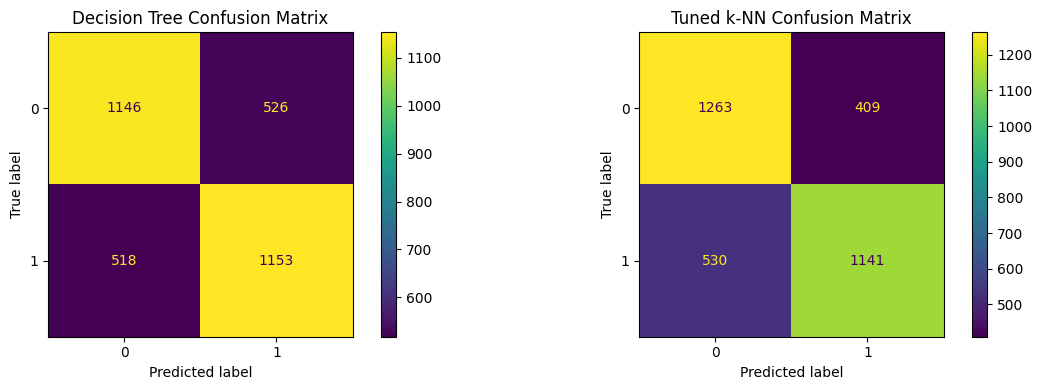

In [72]:
# pick two models to show (Decision Tree + tuned k-NN)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ConfusionMatrixDisplay.from_predictions(y_test, dt_pred, ax=axes[0], values_format="d")
axes[0].set_title("Decision Tree Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, best_knn_pred, ax=axes[1], values_format="d")
axes[1].set_title("Tuned k-NN Confusion Matrix")

plt.tight_layout()
plt.show()

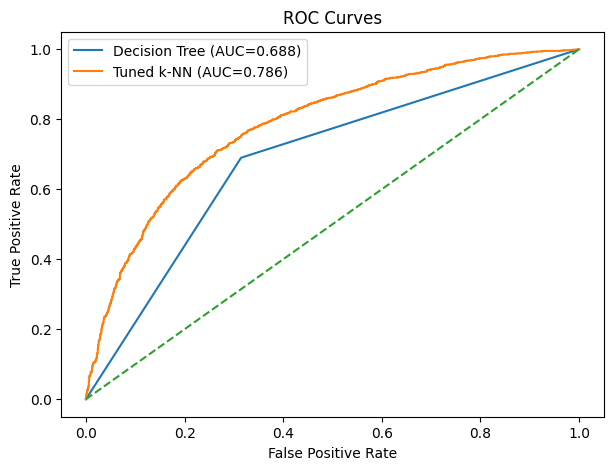

In [73]:
def plot_roc(model, X_te, y_te, label):
    # need probabilities for ROC
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_te)[:, 1]
    else:
        # fallback: use decision_function if available
        proba = model.decision_function(X_te)
        proba = (proba - proba.min()) / (proba.max() - proba.min() + 1e-9)

    fpr, tpr, _ = roc_curve(y_te, proba)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# probs
fpr_dt, tpr_dt, auc_dt = plot_roc(dt, X_test, y_test, "Decision Tree")
fpr_knn, tpr_knn, auc_knn = plot_roc(best_knn, X_test, y_test, "Tuned k-NN")

plt.figure(figsize=(7,5))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={auc_dt:.3f})")
plt.plot(fpr_knn, tpr_knn, label=f"Tuned k-NN (AUC={auc_knn:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


In [74]:
## Step 6: Clustering Using K-Means

# Clustering is used to discover hidden patterns in the dataset without using target labels.

# Steps:
# 1. Standardize features
# 2. Determine optimal number of clusters usinng K selection
# 3. Fit K-Means model
# 4. Assign cluster labels
# 5. Visualize clusters using PCA (2D projection)


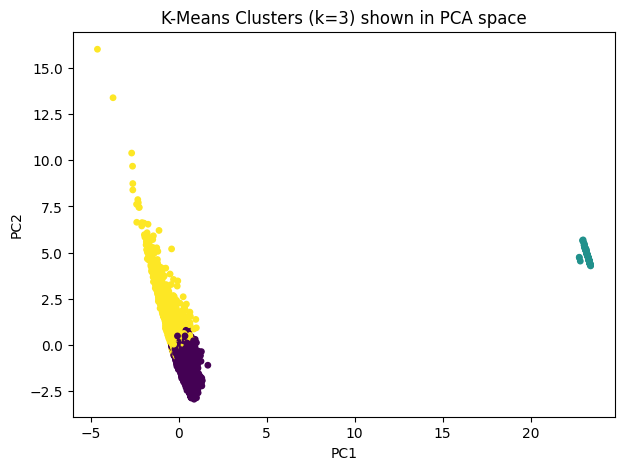

cluster
0          8064
1            88
2          8560
Name: count, dtype: int64

In [75]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Use numeric-only features for clustering (no target)
Xc = df.drop(columns=[target]).select_dtypes(include=["int64","float64"]).copy()
Xc = Xc.replace([np.inf, -np.inf], np.nan)
Xc = Xc.fillna(Xc.median(numeric_only=True))

# scale
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(Xc)

# choose k (start with 3–5; adjust if needed)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(Xc_scaled)

# PCA to 2D for plotting
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xc_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X2[:,0], X2[:,1], c=clusters, s=15)
plt.title(f"K-Means Clusters (k={k}) shown in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

df_clusters = df.copy()
df_clusters["cluster"] = clusters
df_clusters[["cluster"]].value_counts().sort_index()


In [76]:
# Cluster summaries (mean of numeric columns)
cluster_profile = df_clusters.groupby("cluster").mean(numeric_only=True)
cluster_profile


,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
cluster,,,,,,,,,,,
0,0.741822,41.130828,0.741567,6.267703,4237.575521,5.667783,0.577753,0.505332,0.316716,1.077629,0.652654
1,1.000000,37.193182,97.931818,0.004984,2510.159091,0.011364,97.931818,0.000000,97.931818,0.659091,0.943182
2,0.264513,56.143925,0.451051,2.936510,7697.920678,11.264603,0.124065,1.569159,0.117290,0.821963,0.351519


In [77]:
## Step 8: Association Rule Mining (Apriori)

# Association rule mining is used to uncover relationships among features by identifying frequent itemsets and generating rules.

# Since Apriori requires transaction-style (one-hot encoded) data, the dataset is prepared as follows:

# 1. Convert numeric features into categorical bins (e.g., Low / Medium / High)  
# 2. Transform the binned features into one-hot encoded "items"
# 3. Apply the Apriori algorithm to generate frequent itemsets using a minimum support threshold
# 4. Generate association rules using:
#    - Minimum confidence
#    - Lift
# 5. Filter and interpret the strongest rules to extract meaningful patterns.


In [78]:
# If you get "ModuleNotFoundError: mlxtend", uncomment:
%pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

# Pick a few meaningful numeric columns that exist in your df
candidate_cols = ["age", "monthly_inc", "debt_ratio", "rev_util", "open_credit", "dependents"]
candidate_cols = [c for c in candidate_cols if c in df.columns]

if len(candidate_cols) < 3:
    raise ValueError("Not enough expected columns found for rule mining. Update candidate_cols to match your dataset.")

tmp = df[candidate_cols].copy()

# bin into categories (Low/Med/High)
binned = pd.DataFrame()
for c in candidate_cols:
    binned[c] = pd.qcut(tmp[c].rank(method="first"), q=3, labels=[f"{c}_LOW", f"{c}_MED", f"{c}_HIGH"])

# one-hot encode transactions
transactions = pd.get_dummies(binned)

# frequent itemsets
freq = apriori(transactions, min_support=0.10, use_colnames=True)

# rules
rules = association_rules(freq, metric="confidence", min_threshold=0.60)
rules = rules.sort_values(["lift", "confidence"], ascending=False)

rules.head(10)


Note: you may need to restart the kernel to use updated packages.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"frozenset({rev_util_rev_util_HIGH, debt_ratio_...",frozenset({open_credit_open_credit_LOW}),0.124581,0.333353,0.100826,0.809318,2.427809,1.0,0.059296,3.496117,0.671799,0.282339,0.713968,0.555889
